In [1]:
#!canda install pydot
#!conda install graphviz
#!conda install pydotplus

In [2]:
from numpy import array
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.utils.vis_utils import plot_model
from keras.layers.embeddings import Embedding
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

In [3]:
# define documents
docs = ['राम्रो छ',
'ठिक गर्नुभयो',
'सहि गर्नुभयो',
'राम्रो प्रयास गर्नुभयो',
'राम्रो काम गर्नुभयो',
'ठिक छ',
'सहि छ',
'गलत छ',
'ठिक भएन',
'गलत गर्नुभयो',
'नराम्रो प्रयास गर्नुभयो',
'राम्रो छैन',
'ठिक छैन',
'नराम्रो काम गर्नुभयो',
'सहि भएन']
# define class labels
labels = array([1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [4]:
# tokenize documents
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(docs)
word2idx = tokenizer.word_index

In [5]:
# integer encode the documents
encoded_docs = [[word2idx[w] for w in text.text_to_word_sequence(doc)] for doc in docs]
print(encoded_docs)

[[2, 3], [4, 1], [5, 1], [2, 6, 1], [2, 7, 1], [4, 3], [5, 3], [8, 3], [4, 9], [8, 1], [10, 6, 1], [2, 11], [4, 11], [10, 7, 1], [5, 9]]


In [6]:
print([text.text_to_word_sequence(doc) for doc in docs])

[['राम्रो', 'छ'], ['ठिक', 'गर्नुभयो'], ['सहि', 'गर्नुभयो'], ['राम्रो', 'प्रयास', 'गर्नुभयो'], ['राम्रो', 'काम', 'गर्नुभयो'], ['ठिक', 'छ'], ['सहि', 'छ'], ['गलत', 'छ'], ['ठिक', 'भएन'], ['गलत', 'गर्नुभयो'], ['नराम्रो', 'प्रयास', 'गर्नुभयो'], ['राम्रो', 'छैन'], ['ठिक', 'छैन'], ['नराम्रो', 'काम', 'गर्नुभयो'], ['सहि', 'भएन']]


In [7]:
print(word2idx)

{'गर्नुभयो': 1, 'राम्रो': 2, 'छ': 3, 'ठिक': 4, 'सहि': 5, 'प्रयास': 6, 'काम': 7, 'गलत': 8, 'भएन': 9, 'नराम्रो': 10, 'छैन': 11}


In [8]:
# pad documents to a max length of 4 words
max_length = 3
vocab_size = len(word2idx)+1 #one extra index 0 for padding word
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
model = Sequential()
model.add(Embedding(vocab_size, 2, input_length=max_length ))
model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

[[ 2  3  0]
 [ 4  1  0]
 [ 5  1  0]
 [ 2  6  1]
 [ 2  7  1]
 [ 4  3  0]
 [ 5  3  0]
 [ 8  3  0]
 [ 4  9  0]
 [ 8  1  0]
 [10  6  1]
 [ 2 11  0]
 [ 4 11  0]
 [10  7  1]
 [ 5  9  0]]


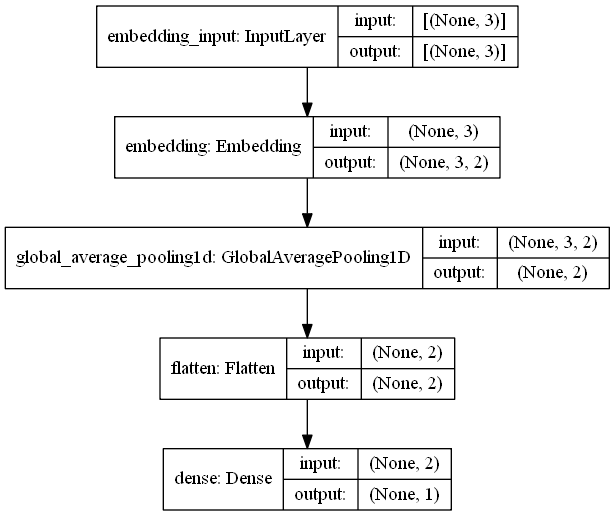

In [9]:
model.compile(optimizer='adam', metrics=['accuracy'], loss=['binary_crossentropy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# fit the model
r = model.fit(padded_docs, labels, epochs=1000, verbose=0 )
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [11]:
name = ['खाली']
for key, value in word2idx.items():
    name.append(key)
name

['खाली',
 'गर्नुभयो',
 'राम्रो',
 'छ',
 'ठिक',
 'सहि',
 'प्रयास',
 'काम',
 'गलत',
 'भएन',
 'नराम्रो',
 'छैन']

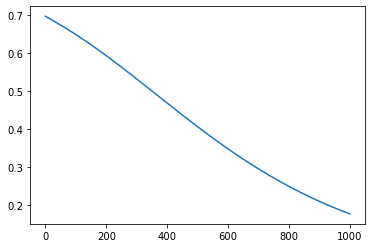

In [12]:
plt.plot(r.history['loss'], label = 'loss')
#plt.plot(r.history['val_loss'], label = 'val_loss')

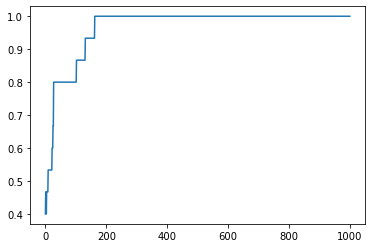

In [13]:
plt.plot(r.history['accuracy'], label = 'acc')
#plt.plot(r.history['val_accuracy'], label = 'val_acc')

In [14]:
import numpy as np
emb_w = np.array(model.layers[0].get_weights())
emb_w = np.array(model.layers[0].get_weights()).reshape(emb_w.shape[1],emb_w.shape[2])
emb_w

array([[ 0.7277737 , -0.6704771 ],
       [-0.9944668 ,  0.92586684],
       [-0.96724194,  0.91116804],
       [-0.91648775,  0.9079764 ],
       [-0.98934823,  0.9739447 ],
       [-0.961113  ,  0.96974033],
       [ 0.72678554, -0.6176505 ],
       [ 0.6840096 , -0.65972096],
       [ 0.96850264, -0.9249776 ],
       [ 0.95062387, -0.91628754],
       [ 0.89551497, -0.9035549 ],
       [ 0.88854754, -0.93948853]], dtype=float32)

11

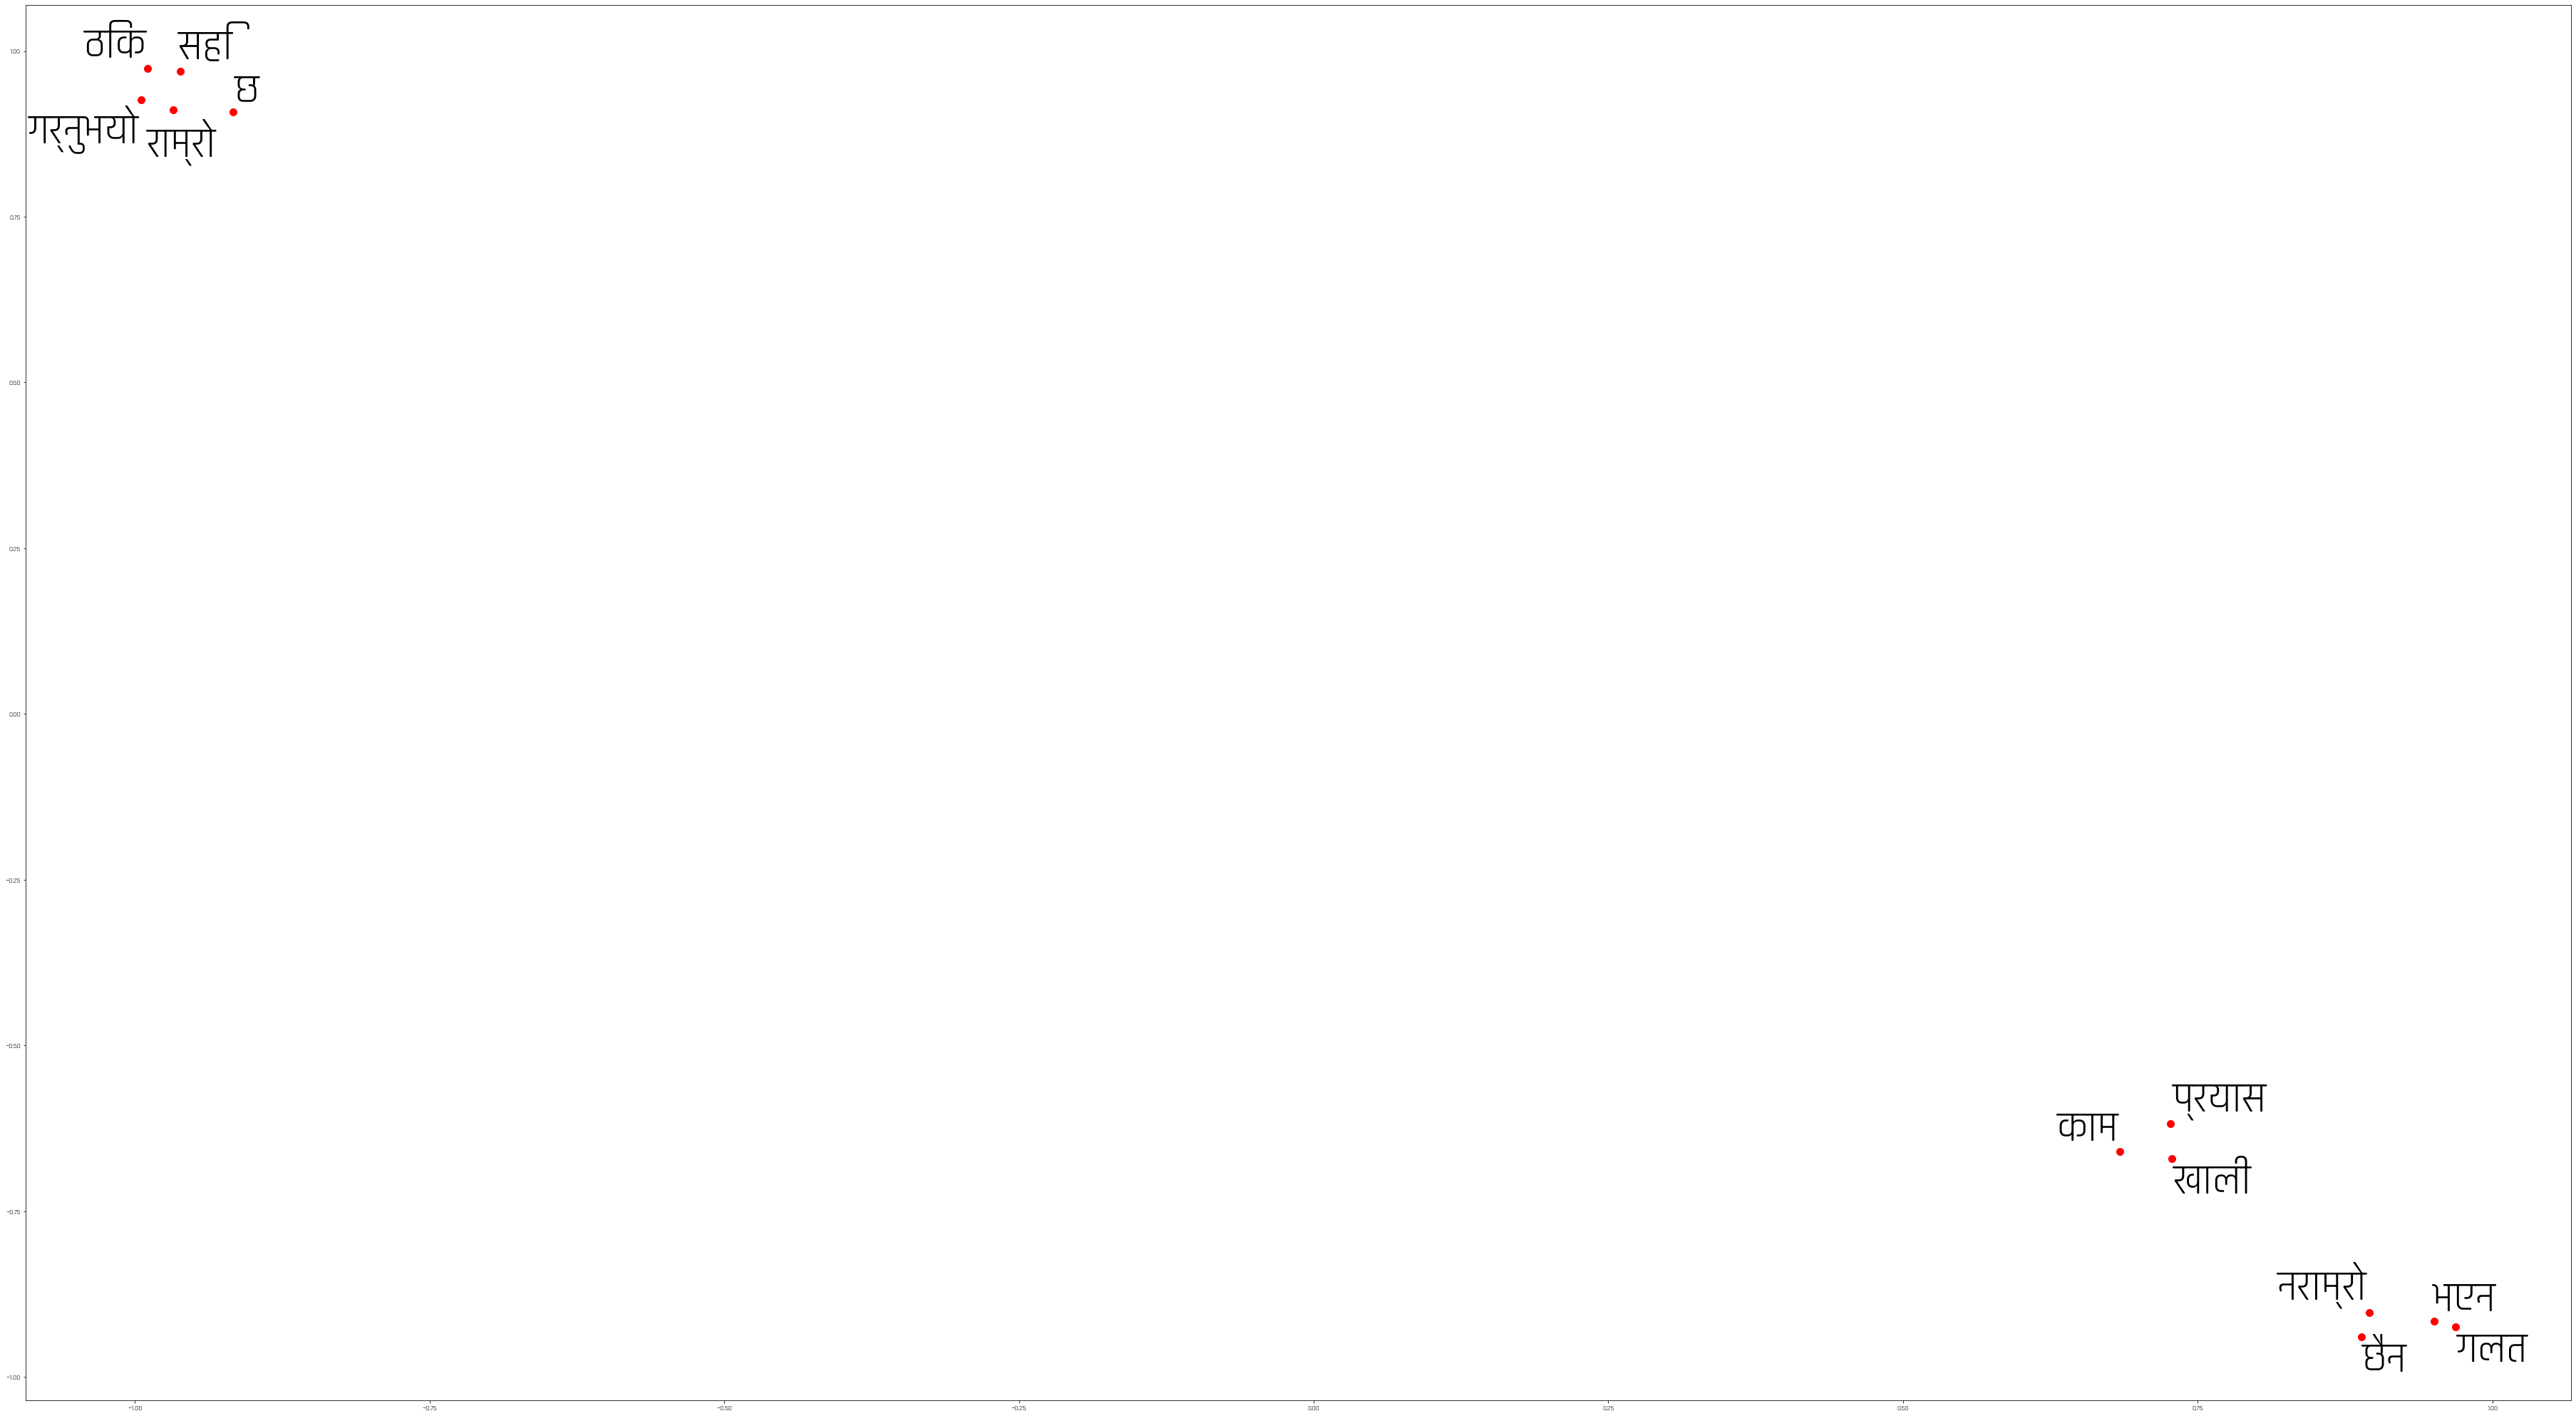

In [15]:
from adjustText import adjust_text
from matplotlib import rcParams
rcParams['font.family'] = 'Rajdhani'
plt.figure(figsize=(64, 36))
plt.scatter(emb_w[:,0], emb_w[:,1], s=100, c='r')
plt.title = "Sentiment clustering plot"
#plt.annotate(name[a-1], xy=(emb_w[:,0][a], emb_w[:,1][a]), fontsize = 60, rotation=a*10+10)
texts = [plt.text(emb_w[:,0][i], emb_w[:,1][i],name[i], fontsize = 60) for i in range(0,len(emb_w))]
adjust_text(texts)

In [16]:
text_input = "ठिक भएन"
print("राम्रो" if model.predict(pad_sequences([[word2idx[w] for w in text.text_to_word_sequence(text_input)]], maxlen=max_length, padding='post'))[0] > 0.5 else "नराम्रो")

नराम्रो
